In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st 
import warnings
warnings.filterwarnings("ignore")

<b> Example:1 </b>

In [5]:

'''      Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30 
'''

'      Science,\tMath,\tArt\nMale         20,      30,    15\nFemale       20,      15,    30 \n'

<b> Question:is Subject prefernce independent from the gender ? </b>

In [6]:
df=pd.DataFrame({'Science':[20,20],'Math':[30,15],'Art':[15,30]},index=['Male','Female'])

In [46]:
df

,Science,Math,Art
Male,20,30,15
Female,20,15,30


In [7]:

stat, p, dof, expected = st.chi2_contingency(df,correction=True)
stat, p, dof, expected

(10.0,
 0.006737946999085468,
 2,
 array([[20. , 22.5, 22.5],
        [20. , 22.5, 22.5]]))

In [8]:
prob = 0.95
critical = st.chi2.ppf(prob, dof)

In [9]:
critical

5.991464547107979

In [10]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.007
Dependent (reject H0)


In [11]:
table = [[10, 20, 30],
          [6,  9,  17]]



In [12]:
stat, p, dof, expected = st.chi2_contingency(table,correction=True)
stat, p, dof, expected

(0.27157465150403504,
 0.873028283380073,
 2,
 array([[10.43478261, 18.91304348, 30.65217391],
        [ 5.56521739, 10.08695652, 16.34782609]]))

In [13]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)


<b> when we have expected frequency available below method use </b>

In [14]:
table1=np.array(table)
table1=table1.reshape(3,2)
table1.shape


(3, 2)

In [15]:
chisq,p=st.chisquare(table1)

In [16]:
chisq,p

(array([17.18367347,  7.58139535]), array([0.00018561, 0.02257984]))

In [17]:


st.chisquare([16, 18, 16, 14, 12, 12], f_exp=[14.6, 14.6, 14.6, 14.6, 14.6, 14.6])
#if not expected then fill this value by mean value

Power_divergenceResult(statistic=2.0109589041095894, pvalue=0.8476265939155094)

In [18]:
Drug=pd.DataFrame({'X-Drug':[10,20,15],'Y-Drug':[25,16,20]},index=['A','B','C'])

In [19]:
Drug # here value indicates the weights looses by drugs Man:A,B,C

,X-Drug,Y-Drug
A,10,25
B,20,16
C,15,20


<AxesSubplot:>

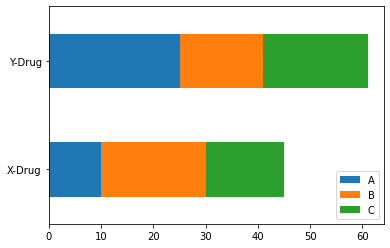

In [20]:

Drug.T.plot(kind='barh', stacked=True)

<b> Question: here man loose weights it is independents from the diffrents drugs </b>
    


<b> Method:1</b>

In [21]:
#H0: xdrug=ydrugs equal of weights loss
# H1:  xdrug != ydrugs not equal 

In [22]:
chis, p, dof, expected = st.chi2_contingency(Drug,correction=True)
chis, p, dof, expected

(5.292797872032844,
 0.07090609124006292,
 2,
 array([[14.85849057, 20.14150943],
        [15.28301887, 20.71698113],
        [14.85849057, 20.14150943]]))

In [23]:
expected=pd.DataFrame({'X':expected[:,0],'Y':expected[:,1]},index=['A','B','C'])
expected

,X,Y
A,14.858491,20.141509
B,15.283019,20.716981
C,14.858491,20.141509


<AxesSubplot:>

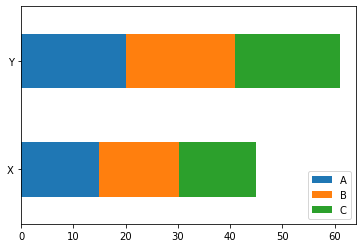

In [24]:
expected.T.plot(kind='barh', stacked=True)

In [25]:
prob = 0.95
critical = st.chi2.ppf(prob, dof)

In [26]:
critical

5.991464547107979

In [27]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.071
Independent (fail to reject H0)


In [28]:
#conclusion : boths  drugs effect the same in terms of weightlosabss


<b> Method:2</b>

In [29]:
Drug['R-sum']=Drug.sum(axis=1)
Drug.loc['Total']=Drug.sum(axis=0)
Drug

,X-Drug,Y-Drug,R-sum
A,10,25,35
B,20,16,36
C,15,20,35
Total,45,61,106


In [30]:
for i in Drug.columns:
       Drug[i+'expected'] =Drug.loc[:, 'R-sum']*Drug.loc['Total', i]/Drug.loc['Total', 'R-sum']

In [31]:
Drug

,X-Drug,Y-Drug,R-sum,X-Drugexpected,Y-Drugexpected,R-sumexpected
A,10,25,35,14.858491,20.141509,35.0
B,20,16,36,15.283019,20.716981,36.0
C,15,20,35,14.858491,20.141509,35.0
Total,45,61,106,45.000000,61.000000,106.0


In [32]:
chiq=0
for i, j in zip(['X-Drug', 'Y-Drug'], ['X-Drugexpected', 'Y-Drugexpected']):
        chiq=chiq+((Drug.loc[:,i]-Drug.loc[:,j])**2/Drug.loc[:,j]).sum()

In [33]:
chiq

5.292797872032844

In [34]:
dof

2

In [35]:
dof

2

In [36]:
#import Data
data_train=pd.read_csv('../data/Car_train-data.csv')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

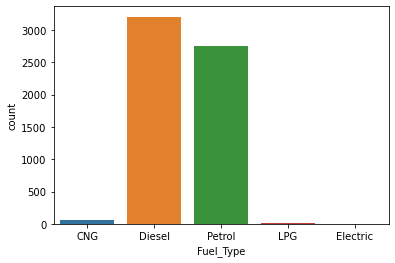

In [37]:
sns.countplot(data_train['Fuel_Type'])

<AxesSubplot:xlabel='Transmission', ylabel='count'>

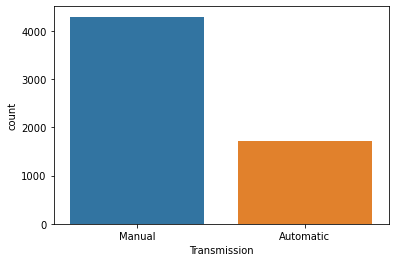

In [38]:
sns.countplot(data_train['Transmission'])

<b> Transmission affect on the seats </b>

In [39]:
Tr_se=pd.crosstab(data_train['Seats'],data_train['Transmission'])
Tr_se

Transmission,Automatic,Manual
Seats,,
0.0,1,0
2.0,15,1
4.0,62,37
5.0,1422,3592
6.0,4,27
7.0,201,473
8.0,6,128
9.0,0,3
10.0,0,5


In [40]:
Tr_se.drop(Tr_se[(Tr_se['Automatic']< 5) | (Tr_se['Manual']<5)].index,inplace=True)

m=list(Tr_se.index)

In [41]:
Tr_se

Transmission,Automatic,Manual
Seats,,
4.0,62,37
5.0,1422,3592
7.0,201,473
8.0,6,128


In [42]:
chi,p,dof,expected=st.chi2_contingency(Tr_se,correction=True)

In [43]:
chi,p,dof,expected

(95.02434441010487,
 1.824246787245479e-20,
 3,
 array([[  28.27377132,   70.72622868],
        [1431.9665597 , 3582.0334403 ],
        [ 192.49011991,  481.50988009],
        [  38.26954906,   95.73045094]]))

In [44]:
prob=0.95
critical=st.chi2.ppf(prob,dof)
critical

7.814727903251179

In [45]:
expected=pd.DataFrame({'Automatic':expected[:,0],'Manual':expected[:,1]},index=m)
expected

,Automatic,Manual
4.0,28.273771,70.726229
5.0,1431.966560,3582.033440
7.0,192.490120,481.509880
8.0,38.269549,95.730451
